<h1>Introduction</h1>
This notebook is used to calculate the following for a Circular Convolution model that has been preprocessed to fit onto a Brainstorm chip.

<h2>Total number of neurons</h2><br>
The total number of neurons is calculated as follows:<br>
<br>
$$TotalNeurons=3*\frac{dims}{subd}*k_1*subd + (2*4*(\lfloor{\frac{dims}{2}}\rfloor + 1)*k_2*1)$$
<br>
where the first term sums up the number of neurons in the input and output layers and the second terms sums up the number of neurons in the middle or product layer.

<h2>Total number of ensembles</h2><br>
The total number of ensembles is calculated as follows:<br><br>

$$TotalEnsembles=3*\frac{dims}{subd} + (2*4* (\lfloor{\frac{dims}{2}}\rfloor + 1))$$

<br>
where the first term sums up the number of ensembles in the input and output layers and the second terms sums up the number of ensembles in the middle or product layer.

<h2>Total decoding weights</h2><br>
The total number of decoding weights is calculated as follows:<br><br>

$$DecodingWeights=3*\frac{dims}{subd}*k_1*subd^2 + 4*dims*k_2*(1^2)$$

where the first term sums up the number of decoding weights in the input and output layers and the second terms sums up the number of decoding weights in the middle or product layer.

<h2>Total encoding weights</h2><br>
The total number of encoding weights is calculated as follows:<br><br>

$$EncodingWeights=3*\frac{dims}{subd}*k_1*subd^2 + F_1*k_2*(1^2)$$

The first term calculates the number of encoding weights in the input and output layers. The second term calculates the number of encoding weights for the middle or product layer. The formula $F_1$ calculates the number of ensembles in the middle layer that have a connection coming from an input layer ensemble. If an input layer ensemble is connected to a middle layer ensemble, there will be an encoding weight for the middle layer ensemble. The formula $F_1$ defined as follows:

$$F_1=(1-(dims\bmod{2})*((4*dims)+4)+(dims\bmod{2})((4*dims)+2)$$

The formula's return value is dependent on whether the number of semantic pointer dimensions is odd or even. If even, the formula will return the first terms value $((4*dims)+4$ and if odd, the formula returns the second terms value $(4*dims)+2$.
<br>

<h2>Total transform resource count</h2><br>
The total transform resource count is calculated as follows:<br><br>

$$TranformResourceCount=F_2+\frac{F_2}{2}=1.5*F_2$$

where $F_2$ is the number of transform resources used between the input layer and the middle layer and because of symmetry in the network, the number of transform resources used between the middle layer and the output layer turns out to be half the transform resources used between the input layer and the middle layer. The formula $F_2$ is defined as follows:

$$F_2=dims*(16*\lfloor{\frac{dims}{2}}\rfloor + 16 - 2^{4-(dims \bmod{2})})) \\
- (1-(dims \bmod{2}))*\delta(subd-1)*\sum_{p=0}^{dims} \sum_{q=1}^{\frac{dims}{2}}\delta((4*p*q)\bmod{dims})*8 \\
- (dims\bmod{2})*\delta(subd-1)*(8*\lfloor{\frac{dims}{2}}\rfloor + \sum_{p=2}^{dims} \sum_{q=2}^{dims}\delta((p*q)\bmod{dims})*4)$$

The formula $F_2$ has three terms when summed calculate the transform resource count from the input layer to the middle layer. The first term calculates the transform resource count for any network whose subdimensions is not one. If the number of subdimensions is not one, the transform resource count is reduced and the reduction amount is dependent on whether the semantic pointer dimensions is odd or even. If even, the second term is subtracted from the first term and if odd, the third term is subtracted from the first term.

The summations in the second and third terms represent the rows and columns of the DFT matrix used when determining the Fourier transform of the networks two input vectors. If the number of subdimensions in the input EnsembleArrays are 1, it is possible that some of the DFT matrix coefficients used in the connection transforms between the input and middle layer Ensembles will be 0 and therefore, will not contribute to the total transform resource count. If this is the case, since we start off assuming that all connections contribute to the count, the amount of resources contributed by the connection with zero transform weight needs to be subtracted from the total transform resource count. The amount to be subtracted depends on whether the number of dimensions is odd or even.

<h2>Total number of synapses</h2><br>
The total number of synapses is calculated as follows:<br><br>
$$
TotalSynapses=1.5*F_2*k_1*k_2
$$<br>
where $F_2$ is the total transform resource count between the input layer and the middle layer, $k_1$ is the neurons per dimension ratio for the ensembles in the input and output layers and $k_2$ is the neurons per dimension ratio for the ensembles in the middle layer. 

This formula defines the total synapses because of specific properties of a preprocessed CircularConvolution network. First, there are only three layers in the network, input, middle (or product) and output. Second, the neurons per dimension ratio for the input and output layers are equal, therefore, any synaptic connection count between an input layer ensemble and a middle layer ensemble is equal to the synaptic connection count between a middle layer ensemble and an output layer ensemble. Third, preprocessing this network guarantee's that for two ensembles, there will be at most one connection. Fourth, regardless of the number of dimensions and subdimensions chosen to define the system, the number of neurons in the input and output layers times the output/dimensions to those ensembles will always be equal to $k_1$. This means that we can use the prodcut of the transform resource counts ($1.5*F_2$) and the neurons per dimension ratios ($k_1$ and $k_2$) to determine the total number of synapses.

<h2>Compression ratio</h2><br>
The compression ratio is calculated as follows:<br><br>
$$CompressionRatio=\frac{EncodingWeights+DecodingWeights+TransformResourceCount}{TotalSynapses}$$

<h2>Fanout</h2><br>
The fanout is calculated as follows:<br><br>
$$
Fanout=\frac{TransformResourceCount}{subd}
$$

This formula defines the fanout because of specific properties of a preprocessed CircularConvolution network. Given a preprocessed CircularConvolution network each transform from the input layer to the middle layer will always be size (subd x 1) and each transform from the middle layer to the output layer will always have size (1 x subd). Therefore, TranformResourceCounts value will always be subd times the total number of connections. The number of connections is derived by simply dividing the TransformResourceCount by subd.

<h2>Average neurons per ensemble</h2><br>
The average neurons per ensemble is calculated as follows:<br><br>

$$AvgNeursonsPerEnsemble=\frac{TotalNeurons}{TotalEnsembles}$$

<h2>Average synapses per neurons</h2><br>
The average neurons per ensemble is calculated as follows:<br><br>

$$AvgNeursonsPerEnsemble=\frac{TotalSynapses}{TotalNeurons}$$

<h2>Average fanout</h2><br>
The average fanout is calculated as follows:<br><br>

$$AvgFanout=\frac{Fanout}{TotalEnsembles}$$

<h2>Notes</h2>
<h3>Repo's used</h3>
The following repo versions were used when calculating these numbers:<br>

github.com:Stanford-BIS/spaun2.0.git<br>
SHA ID: 55e618e912f685631f71ccd40d9475dd44e1b08b


github.com:ctn-waterloo/nef-chip-hardware.git<br>
SHA ID: a0a7cd470b5f0ca12c68de35ec0b28f437526bba

github.com:nengo/nengo.git<br>
SHA ID: a4e6cb6196e99b14d4165fab692d6b8eaab610cf



# Circular convolution network
The following builds a Circular convolution network using the subnetworks, Buffer and Cortical, found in the nengo.spa module.

In [3]:
%%capture
import nengo
import nengo_brainstorm_pp as pp
import nengo.spa as spa
import compute_stats as cp

def make_conv_network(dims=8,subdims=2,pstc=0.01):
    model = spa.SPA()                                                       
    with model:                                                             
        model.inA = spa.Buffer(dims, subdimensions=subdims)                     
        model.inB = spa.Buffer(dims, subdimensions=subdims)                     
                                                                                
        model.result = spa.Buffer(dims, subdimensions=subdims)                  
                                                                                
        model.cortical = spa.Cortical(spa.Actions('result = inA * inB'),       
                                      synapse=pstc)                       
                                                                                
        model.input = spa.Input(inA='A', inB='B')                           
                                                                                
        probe = nengo.Probe(model.result.state.output, synapse=pstc) 
                                                                                
        ideal = nengo.Node(model.get_output_vocab('inA').parse('A*B').v)       
        probe_ideal = nengo.Probe(ideal, synapse=None)                 
    return model  


dims=2
subdims=1
conv_model = make_conv_network(dims=dims,subdims=subdims)
#gv_utils.gv_plot(conv_model)

If we preprocess the network, we get the following.

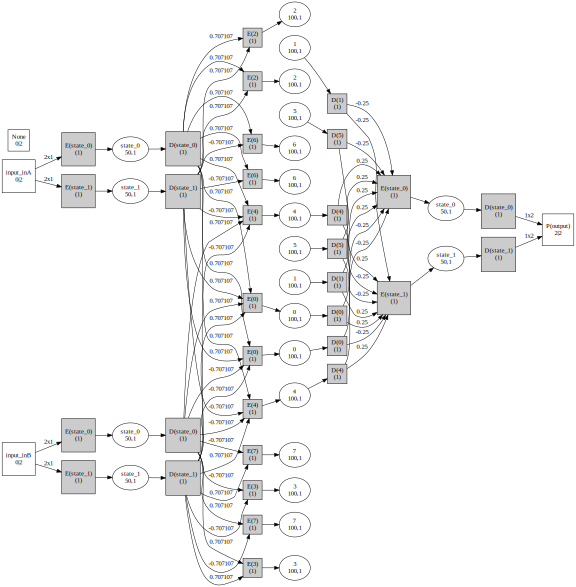

In [4]:
%%capture
from nengo_brainstorm_pp import gv_utils
new_conv_model = pp.preprocess(conv_model,find_io = False)
gv_utils.gv_plot(new_conv_model,size=(8,20))

In the preprocessed network, notice that it is composed of three layers of Ensembles. The first layer has Ensembles that were in the spa.Buffer input networks. The second layer has Ensembles that were in the spa.Cortical network. Finally, the third layer has Ensembles that were in the spa.Buffer output network.

Each Ensemble that is connected to another Ensemble will have two nengo.Nodes between them. The first
nengo.Node decodes the values coming out of the Ensemble and the second nengo.Node encodes values going into the destination Ensemble. In between the two nengo.Nodes will be a transform matrix.

In [ ]:
k_1 = 50
k_2 = 100

###################
# encoding weights
###################

def _cconv_io_layer_enc_dec_weights(dims,subdims):
    return 3*(dims/subdims)*k_1*(subdims**2)

def _cconv_conv_layer_enc_weights(dims,subdims):
    result = 0
    
    if dims % 2 == 1:
        result = ((4*dims)+2)*k_2*(1**2)
    else:
        result = ((4*dims)+4)*k_2*(1**2)
    
    return result

def _cconv_encoding_weights(dims,subdims):
    return _cconv_io_layer_enc_dec_weights(dims,subdims) + \
           _cconv_conv_layer_enc_weights(dims,subdims)

###################
# decoding weights
###################

def _cconv_conv_layer_dec_weights(dims,subdims):
    return (4*dims)*k_2*(1**2)

def _cconv_decoding_weights(dims, subdims):
    return _cconv_io_layer_enc_dec_weights(dims,subdims) + \
           _cconv_conv_layer_dec_weights(dims,subdims)

###################
# transform resource counts
###################
# if the number of dimensions is odd
def _cconv_tr_odd(dims,subdims):
    result = 0
    if subdims == 1:
        #result -= 4 * (2*(dims // 2 + 1) - 2)
        result += 8*(dims // 2)
        for p in range(2,dims):
            for q in range(2,dims):
                if ((p*q) % dims) == 0:
                    result += 4
    return result

# if the number of dimensions is even
def _cconv_tr_even(dims,subdims):
    result = 0
    if subdims == 1:
        # now using the size of the dft_half matrix (dims are p columns and q rows)
        # if the value of a cell in dft_half (p*q) modulo dims is 0 or dims/2
        # then there is no imaginary component
        for p in range(0,dims):
                for q in range(1,dims/2):
                    #if ((p*q) % dims) == 0 or ((p*q) % dims) == dims/2.0:
                    #    print "p=",p," q=",q
                    #    result -= 8
                    #if ((p*q) % dims) == dims/4.0 or ((p*q) % dims) == 3*dims/4.0:
                    #    print "p=",p," q=",q
                    #    result -= 8
                    if (4*(p*q) % dims) == 0:
                        result += 8

    return result

def _cconv_tr_to_conv_layer(dims,subdims):
    result = dims * (16*(dims // 2) + 16 - (2**(4-(dims%2))))
    if dims % 2 == 0:
        result -= _cconv_tr_even(dims,subdims)
    else:
        result -= _cconv_tr_odd(dims,subdims)
    return result

def _cconv_tr_to_output_layer(dims,subdims):
    return _cconv_tr_to_conv_layer(dims,subdims) / 2

def _cconv_transform_counts(dims,subdims):
    return int(1.5 * _cconv_tr_to_conv_layer(dims,subdims))

###################
# synaptic weights
###################

def _cconv_synaptic_weights(dims,subdims):
    return _cconv_transform_counts(dims,subdims) * k_1 * k_2

###################
# compression ratio
###################

def cconv_compression(dims,subdims):
    return (_cconv_encoding_weights(dims, subdims) + \
            _cconv_decoding_weights(dims, subdims) + \
            _cconv_transform_counts(dims, subdims)) / \
             float(_cconv_synaptic_weights(dims, subdims))

###################
# number of neurons
###################

def cconv_num_neurons(dims,subdims):
    return (3*(dims/subdims)*k_1*(subdims)) + (2*4*(dims//2 + 1)*k_2*1)

###################
# number of ensembles
###################

def cconv_num_ensembles(dims,subdims):
    return 3*(dims/subdims) + 2*4*(dims//2 + 1)

print "CConv number of neurons = ",cconv_num_neurons(dims,subdims)
print "CConv number of ensembles = ",cconv_num_ensembles(dims,subdims)
print "CConv decoding weights =",_cconv_decoding_weights(dims,subdims)
print "CConv encoding weights =",_cconv_encoding_weights(dims,subdims)
print "CConv transform resource count=",_cconv_transform_counts(dims,subdims)
print "CConv number of synapses = ",_cconv_synaptic_weights(dims,subdims)
print "CConv compression ratio = %.8f" % cconv_compression(dims,subdims)
print "CConv fanout = ",_cconv_transform_counts(dims,subdims)/subdims
print "Avg. neurons per ensemble = %.2f" % float(cconv_num_neurons(dims,subdims)/float(cconv_num_ensembles(dims,subdims)))
print "Avg. synapses per neuron = %.2f " % float(_cconv_synaptic_weights(dims,subdims)/float(cconv_num_neurons(dims,subdims)))
print "Avg. fanout = %.2f" % float(float(_cconv_transform_counts(dims,subdims)/subdims)/float(cconv_num_ensembles(dims,subdims)))
# uncomment the following to compare equations to 
# values obtained from counting connections, ensembles, neurons, etc.
#cp.compute_stats(new_conv_model)

CConv number of neurons =  1900
CConv number of ensembles =  22
CConv decoding weights = 1100
CConv encoding weights = 1500
CConv transform resource count= 48
CConv number of synapses =  240000
CConv compression ratio = 0.01103333
CConv fanout =  48
Avg. neurons per ensemble = 86.36
Avg. synapses per neuron = 126.32 
Avg. fanout = 2.18
